In [1]:
from astropy.io import fits
from astropy.nddata import NDData
from astropy.stats import sigma_clipped_stats
from astropy.table import QTable
from astropy.visualization import simple_norm
from astropy.wcs import WCS
from photutils import extract_stars, EPSFBuilder

In [2]:
fn = 'hlsp_k2superstamp_k2_photometer_c0-m35-bjd2456788.8217_kepler_v1_image.fits'
hdu = fits.open(fn)
data = hdu[0].data
header = hdu[0].header
wcs = WCS(header)
stars_tbl = QTable.read('gaia_catalog.ecsv')

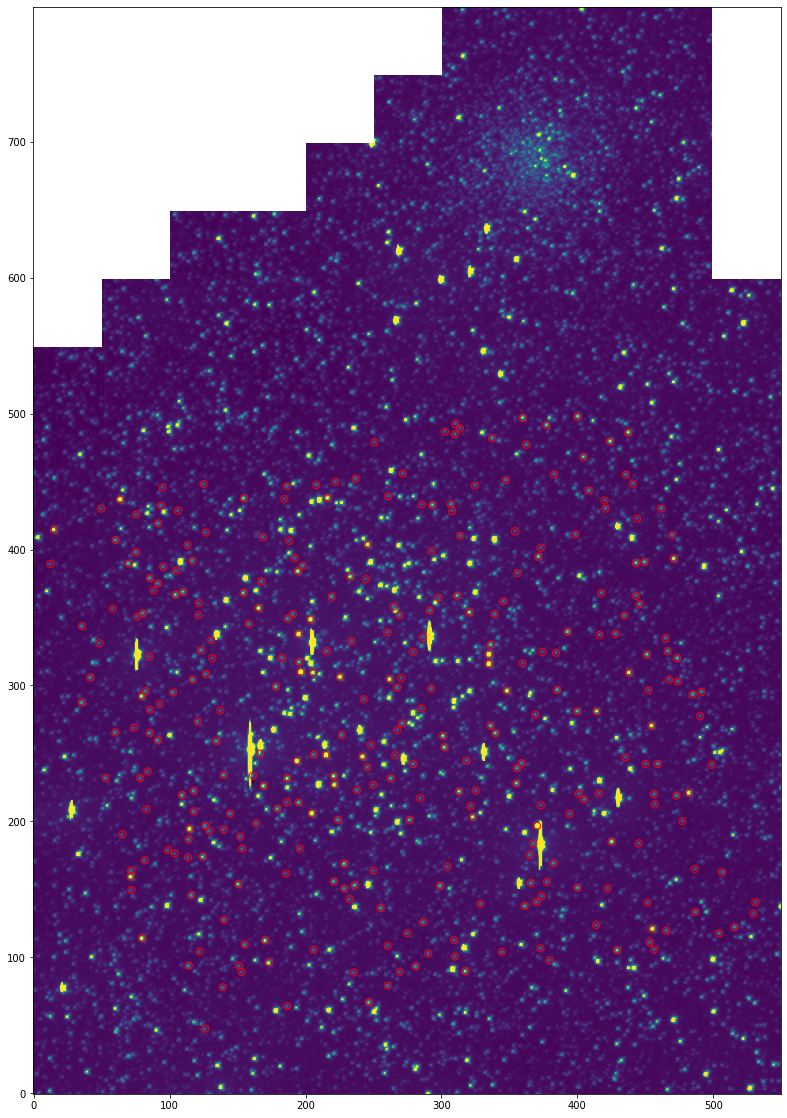

In [3]:
fig = plt.figure(figsize=(20, 20))
norm = simple_norm(data, 'sqrt', percent=99.)
plt.imshow(data, norm=norm, origin='lower')
xpos, ypos = wcs.world_to_pixel(stars_tbl['skycoord'])
plt.scatter(xpos, ypos, s=50, fc='none', color='red')

In [4]:
mean_val, median_val, std_val = sigma_clipped_stats(data, sigma=2.)

In [5]:
mean_val, median_val, std_val = sigma_clipped_stats(data, sigma=2.)
bkg = 2.5 * median_val - 1.5 * mean_val
nddata = NDData(data=data-bkg, wcs=wcs)
stars = extract_stars(nddata, stars_tbl, size=9)
oversample = 4
epsf_builder = EPSFBuilder(oversampling=oversample, recentering_boxsize=3,
                           recentering_maxiters=20, maxiters=10, progress_bar=True)
epsf, fitted_stars = epsf_builder(stars)

/Users/lbradley/.pyenv/versions/3.8.5/lib/python3.8/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)


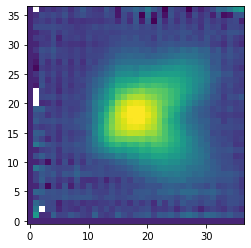

In [6]:
norm = simple_norm(epsf.data, 'log', percent=99.)
plt.imshow(epsf.data, norm=norm, origin='lower')

In [7]:
fits.writeto('epsf-v2.fits', epsf.data, overwrite=True)